In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [37]:
df = pd.read_csv("D:\\Academic\\BSc (External) Applied Data Analytics\\Year 02\\Semester 02\\DA 2015 - Statistics Laboratory II\\Project\\DA2015-Project\\Boston.csv")

DATA PREPROCESSING

In [38]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)


In [40]:
df.shape

(506, 14)

In [41]:
df.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [42]:
df.duplicated().sum()


0

In [43]:
df.dtypes


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [44]:
df['chas'] = df['chas'].astype('category')


The variable chas, representing Charles River adjacency, was converted to a categorical type to reflect its binary nature. All other variables were already stored in appropriate numerical formats.

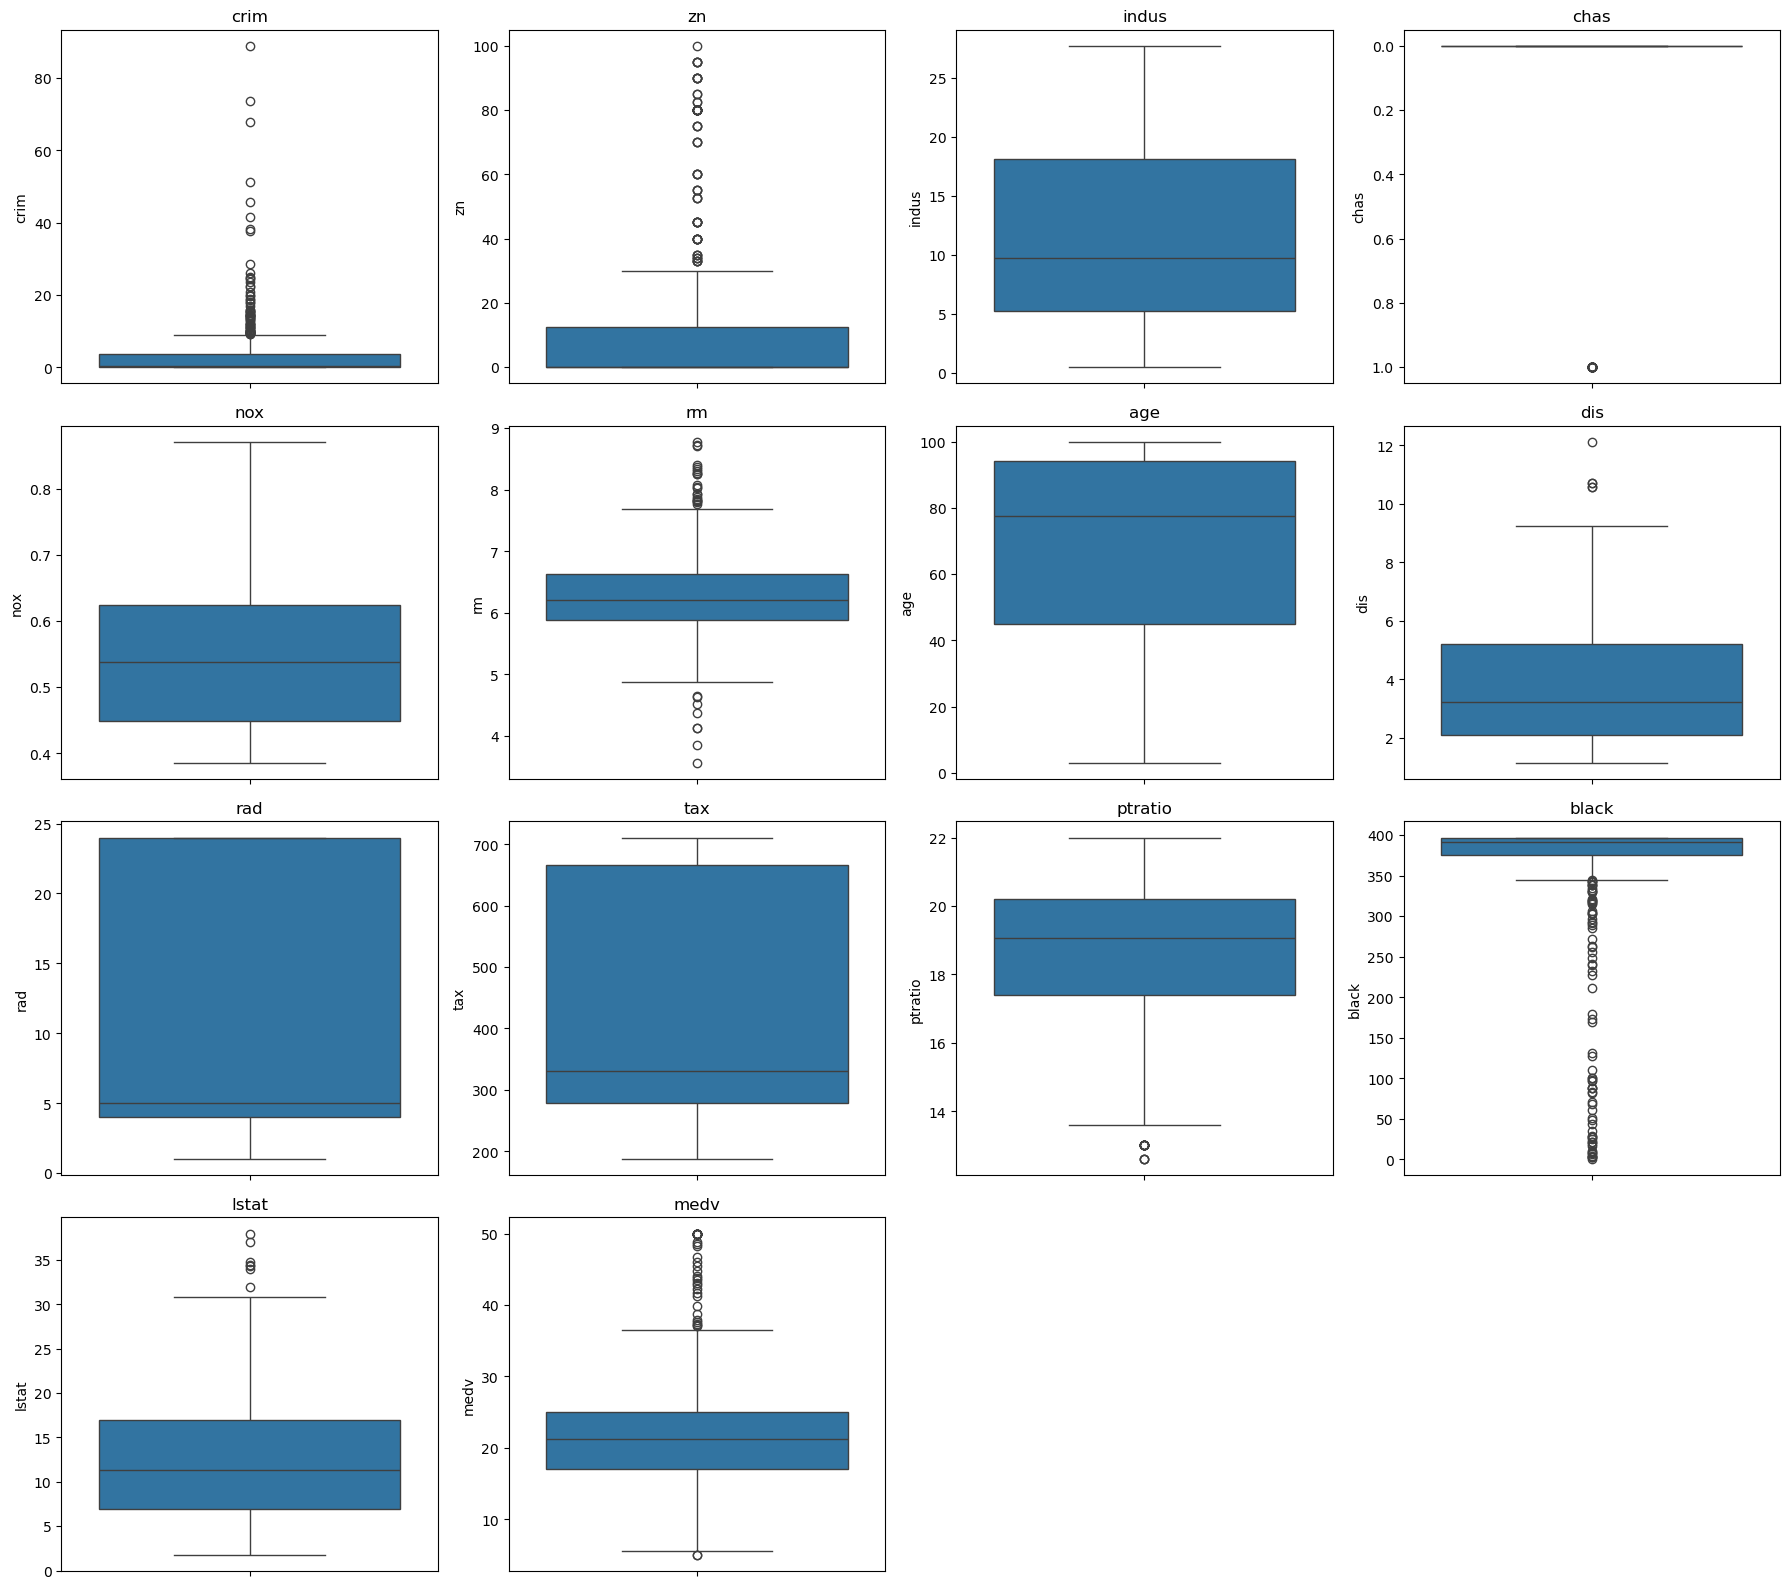

In [45]:
cols = df.columns
n = len(cols)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


PRELIMINARY ANALYSIS (EDA)

In [46]:
df.describe()


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


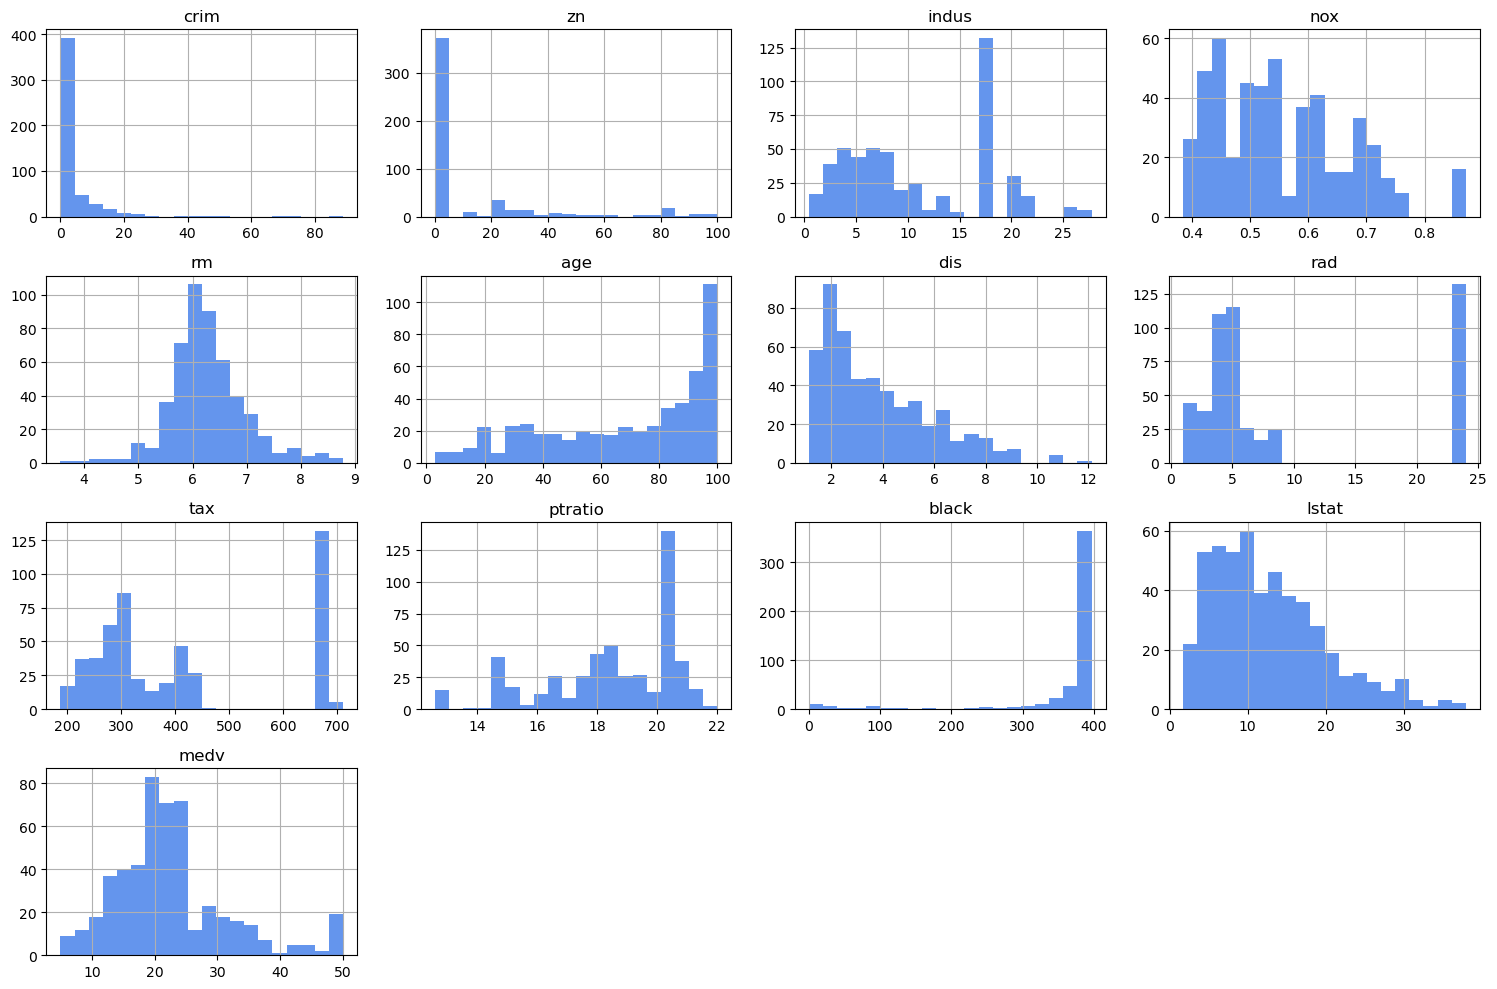

In [47]:
df.hist(bins=20, figsize=(15,10),color='cornflowerblue')
plt.tight_layout()
plt.show()


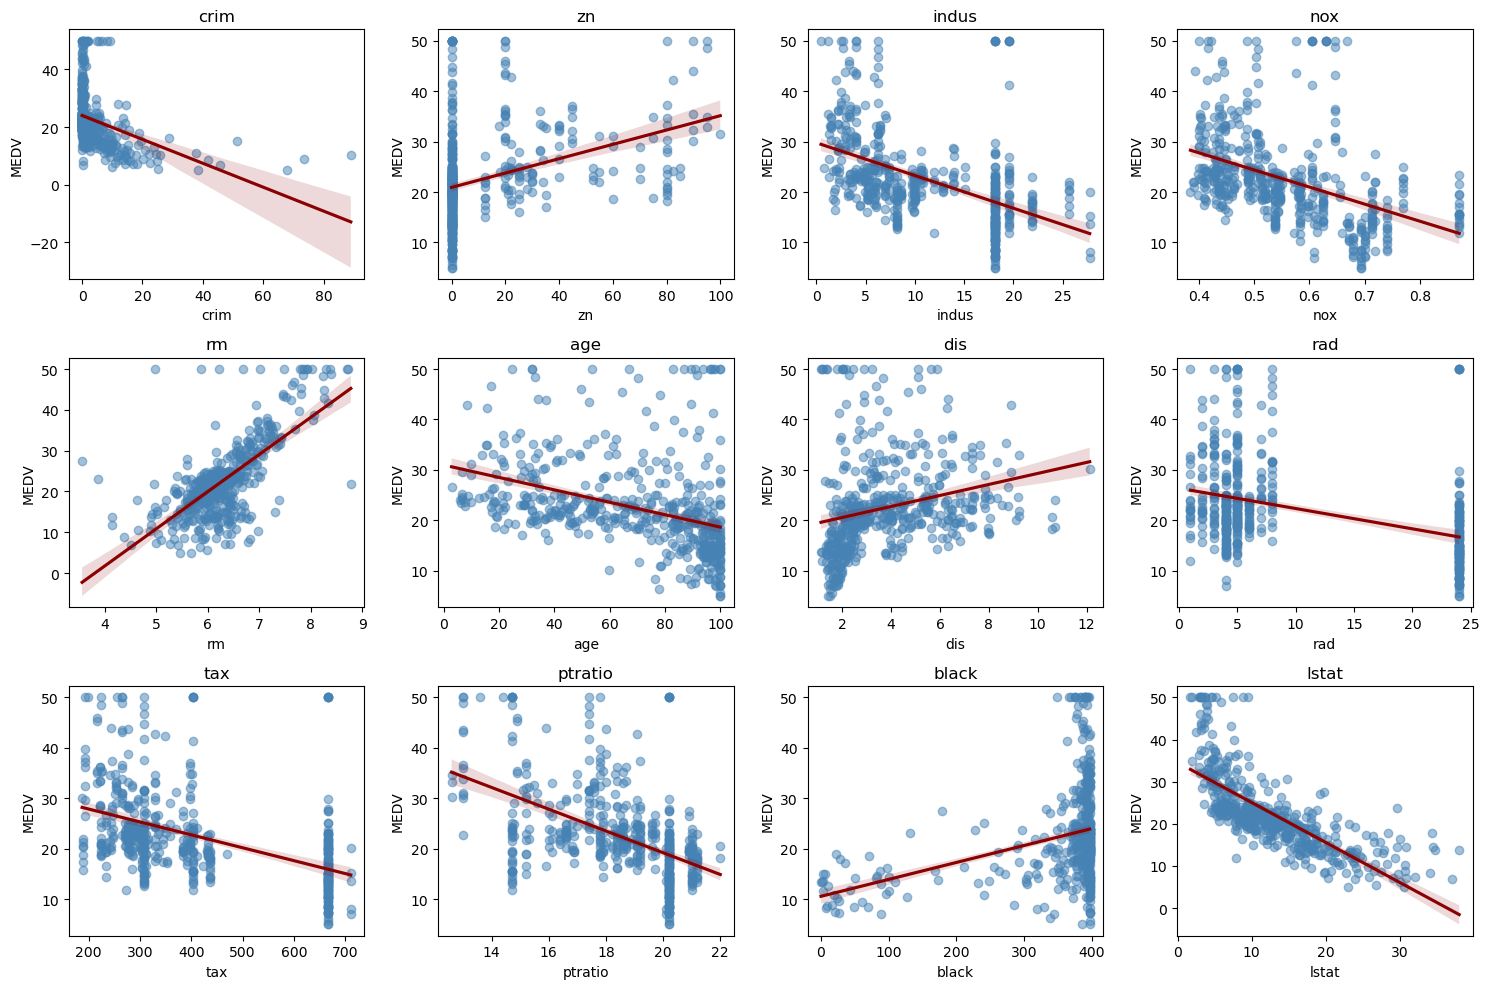

In [48]:
predictors = df.columns.drop(['medv', 'chas'])

n_cols = 4
n_rows = int(np.ceil(len(predictors) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(predictors):
    sns.regplot(
        x=df[col],
        y=df['medv'],
        ax=axes[i],
        scatter_kws={'alpha':0.5, 'color':'steelblue'},
        line_kws={'color':'darkred'}
    )
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("MEDV")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


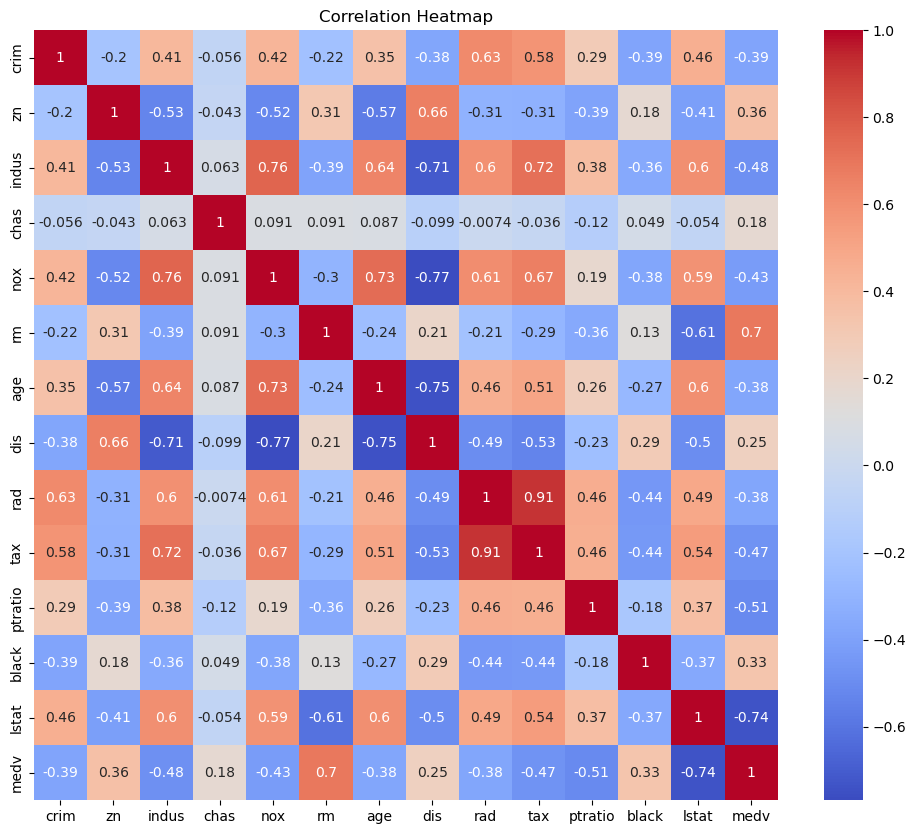

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ADVANCED ANALYSIS

Simple Linear Regression

In [50]:
model_simple = smf.ols("medv ~ rm", data=df).fit()
print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           2.49e-74
Time:                        17:33:03   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Multiple Linear Regression

In [51]:
X = df.drop(columns='medv')
y = df['medv']

X_const = sm.add_constant(X)
model_multiple = sm.OLS(y, X_const).fit()

print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 17 Dec 2025   Prob (F-statistic):          6.72e-135
Time:                        17:33:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Multicollinearity Check (VIF)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

vif_data


,Variable,VIF
0,const,585.265238
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


In [53]:
reduced_model = smf.ols("medv ~ rm + lstat + nox + ptratio + tax", data=df).fit()

print(reduced_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     212.2
Date:                Wed, 17 Dec 2025   Prob (F-statistic):          4.06e-121
Time:                        17:33:03   Log-Likelihood:                -1552.2
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     500   BIC:                             3142.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1237      4.254      4.261      0.0

In [54]:
reduced_model = smf.ols("medv ~ rm + lstat + ptratio", data=df).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Wed, 17 Dec 2025   Prob (F-statistic):          2.69e-123
Time:                        17:33:03   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.0

Model Diagnostics

Normality of residuals

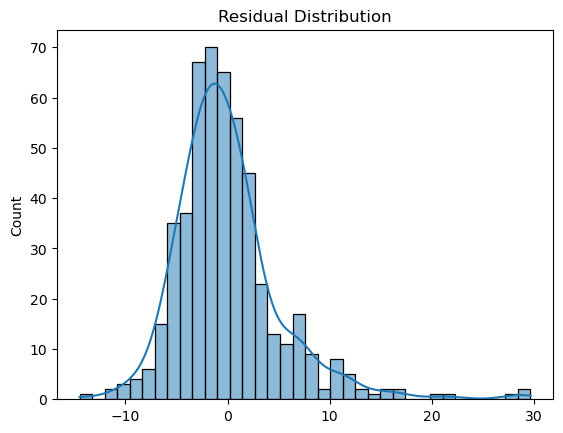

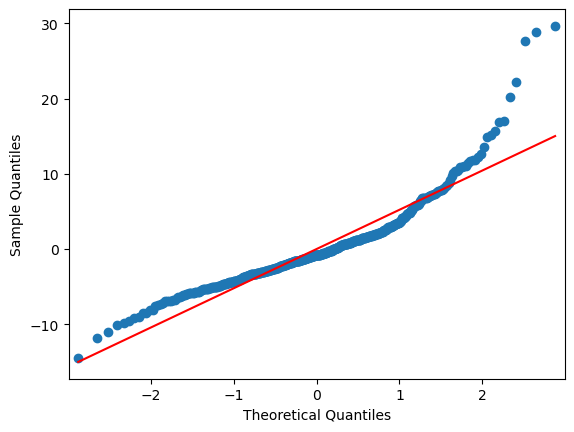

In [55]:
residuals = reduced_model.resid

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

sm.qqplot(residuals, line='s')
plt.show()


Homoscedasticity

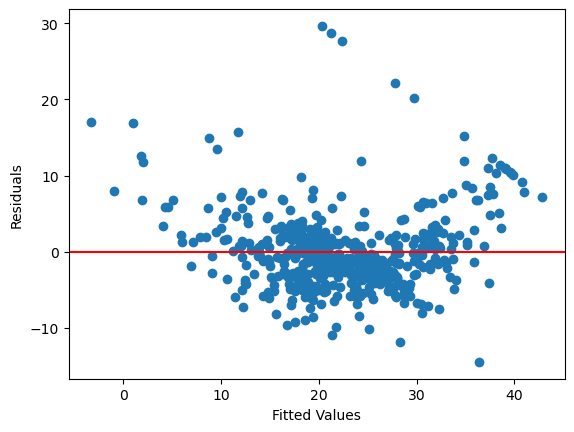

In [56]:
plt.scatter(reduced_model.fittedvalues, residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


Train–Test Evaluation

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)


# Training metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Testing metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

rmse_train, r2_train, rmse_test, r2_test

(4.6520331848801675, 0.7508856358979673, 4.928602182665336, 0.668759493535632)

In [59]:
performance = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'RMSE': [rmse_train, rmse_test],
    'R²': [r2_train, r2_test]
})

performance


,Dataset,RMSE,R²
0,Training,4.652033,0.750886
1,Testing,4.928602,0.668759


Lasso Regression

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

rmse_train_lasso, r2_train_lasso, rmse_test_lasso, r2_test_lasso


(4.652799450865669, 0.7508035627152096, 4.932899670641635, 0.6681815922762605)

In [61]:
pd.Series(lasso.coef_, index=X.columns)


crim      -0.974393
zn         0.646665
indus      0.187143
chas       0.720090
nox       -1.959138
rm         3.151434
age       -0.153203
dis       -3.011678
rad        2.071401
tax       -1.587604
ptratio   -2.019253
black      1.117646
lstat     -3.609323
dtype: float64

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)

lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

rmse_train_lasso, r2_train_lasso, rmse_test_lasso, r2_test_lasso


(5.290949284847797, 0.677759324491771, 5.2514466365121475, 0.6239428734251422)

In [63]:
pd.Series(lasso.coef_, index=X.columns)

crim      -0.012390
zn         0.000000
indus     -0.000000
chas       0.038404
nox       -0.000000
rm         3.079458
age       -0.000000
dis       -0.000000
rad       -0.000000
tax       -0.000000
ptratio   -1.220905
black      0.449798
lstat     -3.376590
dtype: float64

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

rmse_train_rf, r2_train_rf, rmse_test_rf, r2_test_rf


(1.3961966541835962, 0.9775608527910135, 2.917224938728114, 0.8839525117021145)

In [65]:
model_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Lasso Regression',
        'Random Forest'
    ],
    'Train RMSE': [
        rmse_train,
        rmse_train_lasso,
        rmse_train_rf
    ],
    'Test RMSE': [
        rmse_test,
        rmse_test_lasso,
        rmse_test_rf
    ],
    'Train R²': [
        r2_train,
        r2_train_lasso,
        r2_train_rf
    ],
    'Test R²': [
        r2_test,
        r2_test_lasso,
        r2_test_rf
    ]
})

model_comparison


,Model,Train RMSE,Test RMSE,Train R²,Test R²
0,Linear Regression,4.652033,4.928602,0.750886,0.668759
1,Lasso Regression,5.290949,5.251447,0.677759,0.623943
2,Random Forest,1.396197,2.917225,0.977561,0.883953


In [66]:
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance


rm         0.492309
lstat      0.323469
dis        0.056308
crim       0.038540
nox        0.015979
ptratio    0.015956
tax        0.015470
age        0.015199
black      0.012431
indus      0.007021
rad        0.004135
zn         0.001891
chas       0.001292
dtype: float64

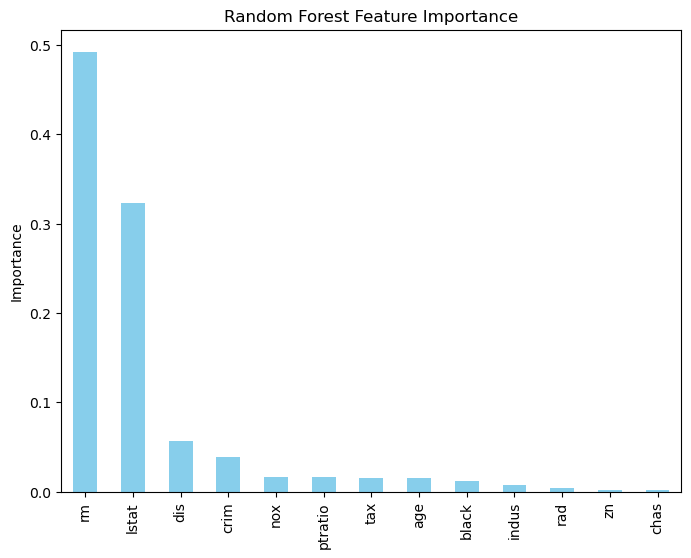

In [67]:
plt.figure(figsize=(8,6))
rf_importance.plot(kind='bar', color='skyblue')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.show()
